## Summary

__Changes__

Added 2 new columns, SepsisClassifier and SepsisOnset. SepsisClassifier False if patient never has sepsis during hospital stay, True if they do. SepsisOnset 1 for hour of sepsis onset, 0 everything else.

__Notes__

_Vital Signs_ - According to the [Mayo clinic](https://www.mayoclinic.org/diseases-conditions/sepsis/symptoms-causes/syc-20351214?utm_source=Google&utm_medium=abstract&utm_content=Sepsis&utm_campaign=Knowledge-panel), symptoms of sepsis include fever, difficulty breathing, low blood pressure, and fast heart rate. That is reflected in the time course data, certainly after sepsis onset, in sepsis vs. non sepsis patients. Sepsis patients have consistently higher average respiration & heart rate at any point compared to non-sepsis patients. Decrease in blood pressure is clearly seen in all sepsis patients post sepsis onset; pre-sepsis onset, SBP shows the strongest downward trend a few hours out, with MAP and DBP not as clear. O2Sat is a bit puzzling, as you'd expect it to clearly go down for sepsis patients, more so than non-sepsis patients. They actually show the same slight downward trend, so not much to conclude now.

_Lab Values_ - Few clear differences in lab values between two groups. Most observed differences in distributions may be attributed to limited sample size (e.g. very few values available for Bilirubin_direct). The only exception is Bilirubin_Total, having lab values for over 30% of patients, and a seemingly different distribution between the two groups.

_Demographic Values_ -
Nearly 1.5x as much sepsis seen at HospitalA than Hospital B. Slightly more than 1.5x as much sepsis seen in MICU than SICU. Sepsis seen slightly more in males than females. Different groups have similar age mean of ~61, with sepsis seeing a slightly larger spread. Sepsis patients stay at the hospital much longer than non-sepsis patients. 


## Code Navigation

* [1. Import Libraries & Data](#1.ImportLibraries&Data)
* [2. Add New Classifier Columns](#2.AddNewClassifierColumns)
* [3. General Data Exploration](#3.GeneralDataExploration)
* [4. Exploring Vital Signs](#4.ExploringVitalSigns)
* [5. Exploring Lab Values](#5.ExploringLabValues)
* [6. Exploring Demographic Values](#6.ExploringDemographicValues)
* [7. Save Data](#7.SaveData)

## 1. Import Libraries & Data <a class="anchor" id="1.ImportLibraries&Data"></a>

In [1]:
import glob, os
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir("../src/data")
from Custom_Func import percent_there

In [3]:
os.chdir("../../data/interim")

In [4]:
#Load in Data
#First, the notes
with open("Data_Notes.json", "r") as infile:  
    notes=json.load(infile)

#Next, the actual data
df=pd.read_csv('sepsis_data_cleaned.csv',index_col=0)

## 2. Add New Classifier Columns <a class="anchor" id="2.AddNewClassifierColumns"></a>

In [5]:
#Add new column to df that classifies if a patient has sepsis at all during their stay: 'SepsisClassifier'
Sepsis_id=df.groupby(['id'])[['SepsisLabel']].sum()
b=np.array(np.where(Sepsis_id['SepsisLabel']>0,'Sepsis','No Sepsis'))
a=np.array(range(5997))
dict = {a[i]: b[i] for i in range(len(b))} 
df['SepsisClassifier']=df['id'].map(dict)
#Add column, with notes, to my notes dictionary
notes['SepsisClassifier']='Column added by me. False if patient never has sepsis during hospital stay, True if they do.'

In [6]:
#Add new column to df that specifies spesis onset; 1 for hour of sepsis onset, 0 everything else: 'SepsisOnset'

#Select all columns and time points of patients that ever develop sepsis in temporary df
df_Sep=df.loc[df.SepsisClassifier=='Sepsis']
#Slice for id, SepsisLabel and vital sign data of interest in new df called df_Sep_pat_var
df_Sep_slice=df_Sep.loc[:,['id','SepsisLabel']]
#Determine the index of sepsis onset for each patient
id_Sep_Init=df_Sep_slice.groupby('id').idxmax()
#Create new column in df_Sep_pat_var df called Sepsis Onset with all values set to 0
df['SepsisOnset']=0
#Where sepsis onset occurs, change value of SepsisOnset to 1.
for i in id_Sep_Init.SepsisLabel:
    df.loc[i,'SepsisOnset']=1
#Assert that there are the same number of sepsis onset points as number of sepsis patients
print(df.SepsisOnset.value_counts()[1]==df.groupby('SepsisClassifier')['id'].nunique()[1])
#Add column, with notes, to my notes dictionary
notes['SepsisOnset']='Column added by me. 1 for hour of sepsis onset, 0 everything else.'

True


## 3. General Data Exploration <a class="anchor" id="3.GeneralDataExploration"></a>

In [7]:
df.Bilirubin_direct.count()

450

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HR,208443.0,84.814434,17.307473,22.00,73.00,84.000,96.0000,200.00
O2Sat,201090.0,97.191715,2.956959,22.00,96.00,98.000,99.5000,100.00
Temp,78438.0,36.987935,0.753095,30.22,36.50,37.000,37.5000,41.22
SBP,196849.0,123.332814,23.080855,24.00,106.00,120.500,138.0000,272.00
MAP,202386.0,81.961677,16.155001,20.00,71.00,80.000,91.0000,295.00
DBP,154566.0,63.579425,13.685631,20.00,54.00,62.000,72.0000,188.00
Resp,196272.0,18.708133,5.126854,1.00,15.00,18.000,21.5000,100.00
EtCO2,8128.0,34.029343,7.751638,10.00,29.00,34.000,39.0000,100.00
BaseExcess,14093.0,-0.691404,4.380761,-32.00,-3.00,0.000,1.0000,24.00
HCO3,10497.0,24.095461,4.500598,5.00,22.00,24.000,26.0000,52.00


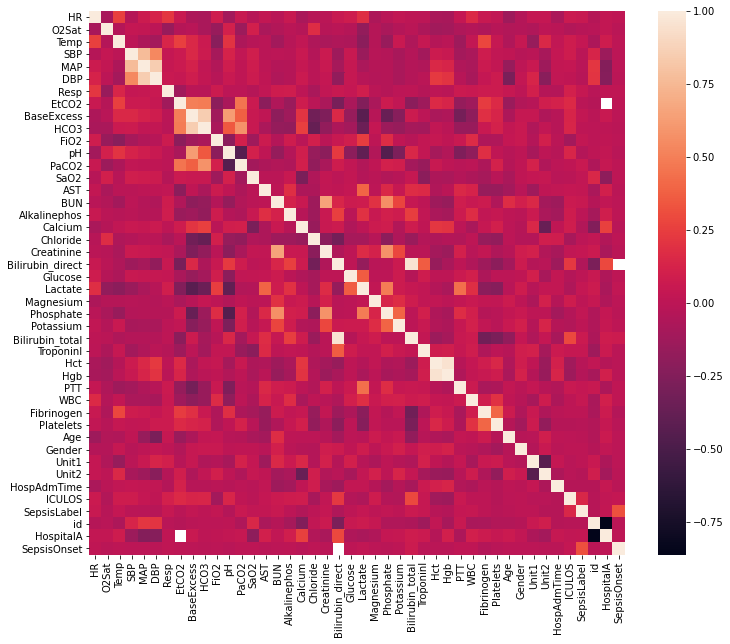

In [9]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr());

No strong correlations of note distinguishable here - there are strong correlations between values you'd expect, like the blood pressure values or some of the lab values (Billirubin Direct & Total, for example).

## 4. Exploring Vital Signs <a class="anchor" id="4.ExploringVitalSigns"></a>

First I will determine where sepsis first occurs for each sepsis patient. Then I will plot the average time course for each vital sign by patient group. The Sepsis patients' data will be plotted relative to sepsis onset (time point 0) while the non-sepsis group will be plotted based on a time range of the same size, centered where most patients are in the ICU and have data points available.

In [10]:
#First, the df is sliced into all of the data from sepsis patients only. Then, the column 'SepsisAxis' is added, which 
#is the hour relative to sepsis onset; -6 for 6 hours before onset, 8 for 8 hours after onset, and so on.
Sepsis_Patients=df[df.SepsisClassifier=='Sepsis'].copy()
Non_Sepsis_Patients=df[df.SepsisClassifier=='No Sepsis'].copy()
Sepsis_id=Sepsis_Patients.id.unique()
Sepsis_Patients['Sepsis_Axis']=0
for i in Sepsis_id:
    patient=Sepsis_Patients[Sepsis_Patients.id==i]
    patient.reset_index(inplace=True)
    mid=(patient.loc[patient.SepsisOnset==1].index.tolist())[0]
    n=len(patient)
    time=np.linspace(-mid, n-mid-1,n)
    Sepsis_Patients.loc[Sepsis_Patients.id==i,'Sepsis_Axis']=time

In [11]:
#This function obtains the averages of the data column of interest relative to sepsis onset for each sepsis patient, from 
#36 hours before onset to 10 hours after. 
#It also gets the averages from the same variable in non-sepsis patients, with the range specified as 10 hours into ICU
#stay to 56 hours in  - this interval was chosen as a compromise because there are significantly more NaNs earlier in 
#patients' stays that seem to throw off the trends, but only 25% of non sepsis patients stay longer than 47 hours.
def VitalSigns_Averaged_Overtime(df1,df2,variable_list):
    Average={}
    time=list(range(-36,10))
    time_=list(range(10,56))
    for var in variable_list:
        #Get averages overtime for Sepsis Patients
        Avg_Sep=[]
        time=list(range(-36,10))
        for i in time:
            Avg_Sep.append(df1.loc[df1['Sepsis_Axis']==i][var].mean())
        #Get averages overtime for Non Sepsis Patients
        Avg_NoSep=[]
        for i in time_:
            Avg_NoSep.append(df2.loc[df2['ICULOS']==i][var].mean())
        Average[var]=[Avg_Sep,Avg_NoSep]
    i=1
    plt.rcParams['figure.figsize'] = (20,10)
    for var in variable_list:
        plt.subplot(3,3,i)
        plt.plot(time,Average[var][0],label='Sepsis',c='orange')
        plt.plot(time,Average[var][1],label='No Sepsis',c='deepskyblue')
        plt.xlabel('Time (Hour)',size=12)
        plt.ylabel(var,size=12)
        plt.title(var,size=12)
        plt.axvline(0,c='red',lw=3)
        plt.legend(loc='lower right')
        i=i+1
    plt.suptitle('Vital Signs Overtime Relative to Sepsis Onset')
    plt.tight_layout()
    plt.show()

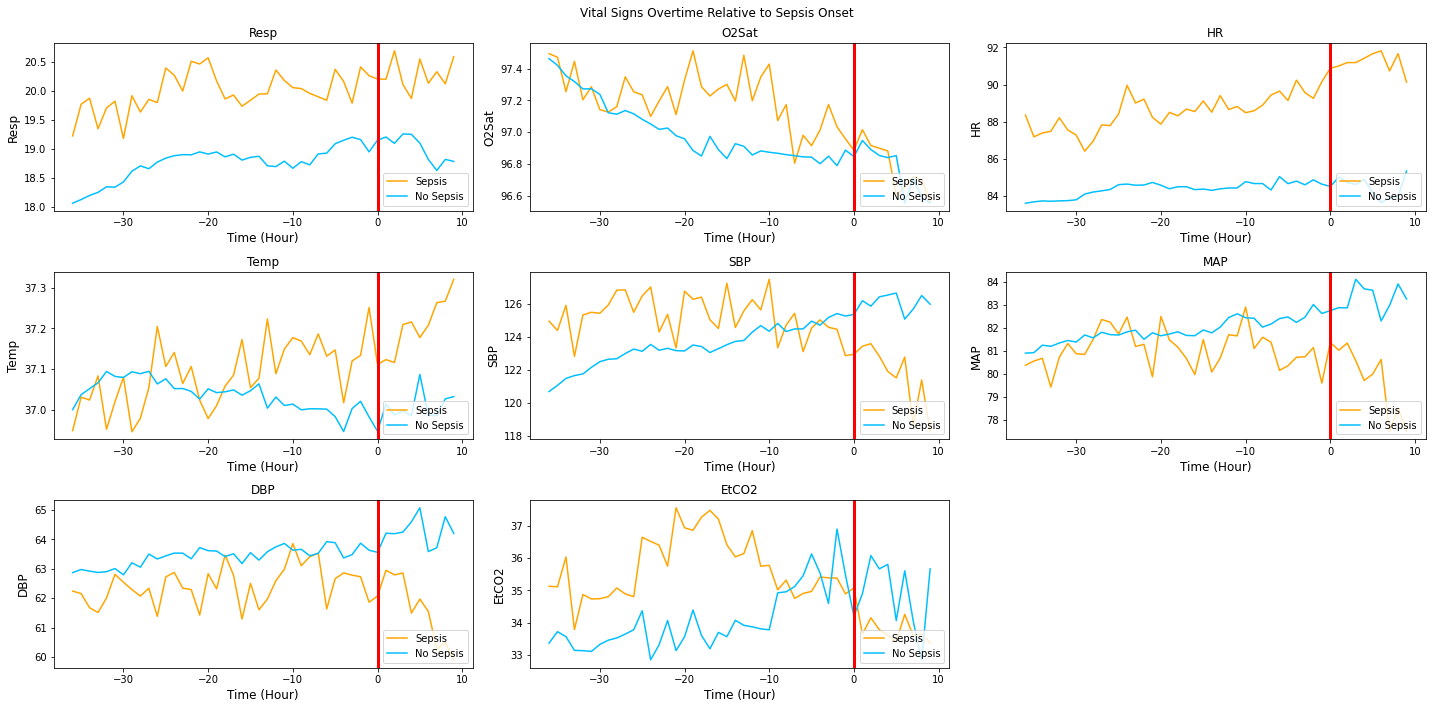

In [12]:
var_list=['Resp','O2Sat','HR','Temp','SBP','MAP','DBP','EtCO2']
VitalSigns_Averaged_Overtime(Sepsis_Patients,Non_Sepsis_Patients,var_list)

In [13]:
notes['Temp']=notes['Temp'] + ' Assessment: A higher average temperature in sepsis patients \
is seen a few hours before sepsis onset.'

notes['Resp']=notes['Resp'] + ' Consistently higher average for sepsis vs. non-Sepsis patients.'

notes['MAP']=notes['MAP'] +' Downward trend in sepsis patients post sepsis onset. Trend a few hours before Sepsis onset may \
trend downward slightly, but its hard to tell.' 

notes['DBP']=notes['DBP'] +' Downward trend in sepsis patients post sepsis onset. Not much noticeable trend before.'

notes['SBP']=notes['SBP'] +' Downward trend in sepsis patients post sepsis onset. Seems to trend downward \
a few hours before sepsis onset.'

notes['HR']=notes['HR'] +' Consistently higher average for sepsis vs. non-sepsis patients, gets higher post sepsis onset.'

#The two remaining vital signs are:

notes['O2Sat']=notes['O2Sat'] + ' Would expect to see a downward trend here, and we do- but its a similar trend to \
non-sepsis patients, and surprisingly sepsis patients have a slightly higher O2sat average pre sepsis? \
A bit puzzling, something to keep in mind for later.'

notes['EtCO2']=notes['EtCO2']+ ' Seems to have higher average for Sepsis patients initially, \
but then flips post sepsis onset - very few patients with this data, however, so unlikely to be useful.'

## 5. Exploring Lab Values <a class="anchor" id="5.ExploringLabValues"></a>

In [14]:
#Create new df called df_lab - only lab values and SepsisClassifier column
df_lab=df.loc[:,'BaseExcess':'Platelets']
df_lab['SepsisClassifier']=df['SepsisClassifier']
df_lab_norm=df_lab.copy()

In [15]:
#Melt the df so that all lab values are stacked in the same column, create new cummulative 'Value' column
df_lab_melted=pd.melt(df_lab,id_vars='SepsisClassifier',var_name='Lab_Name',value_name='Value')
#Calculate summary statistics for each combination of lab value and sepsis group
func={'Value':['max','min','median','mean','std']}
df_lab_melted.groupby(['Lab_Name','SepsisClassifier']).aggregate(func)

Value                              \
                                       max    min   median        mean   
Lab_Name         SepsisClassifier                                        
AST              No Sepsis         9747.00   6.00   41.000  292.393583   
                 Sepsis            9229.00  10.00   65.000  488.568147   
Alkalinephos     No Sepsis         1000.00  14.00   73.000  103.692469   
                 Sepsis             603.00  18.00   83.000  112.374436   
BUN              No Sepsis          232.00   1.00   17.000   22.818752   
                 Sepsis             182.00   1.00   22.000   28.267670   
BaseExcess       No Sepsis           24.00 -32.00    0.000   -0.751250   
                 Sepsis              21.00 -19.00    0.000   -0.455419   
Bilirubin_direct No Sepsis           20.55   0.01    0.400    1.506766   
                 Sepsis              29.10   0.08    0.550    3.200122   
Bilirubin_total  No Sepsis           44.60   0.10    0.800    1.737854   
                 Sepsis              39.00   0.10    1.500    4.863333   
Calcium          No Sepsis           25.20   1.00    8.300    7.700818   
                 Sepsis              18.00   1.00    8.200    7.417786   
Chloride         No Sepsis          139.00  74.00  106.000  105.837259   
                 Sepsis             126.00  80.00  106.000  105.389371   
Creatinine       No Sepsis           24.00   0.10    0.900    1.470392   
                 Sepsis              18.30   0.28    1.100    1.810832   
FiO2             No Sepsis            1.00   0.00    0.500    0.525591   
                 Sepsis               1.00   0.20    0.500    0.515128   
Fibrinogen       No Sepsis         1000.00  50.00  244.000  275.340657   
                 Sepsis             954.00  35.00  182.000  240.144262   
Glucose          No Sepsis          924.00  14.00  126.000  137.300680   
                 Sepsis             500.00  18.00  127.000  134.852772   
HCO3             No Sepsis           52.00   5.00   24.000   24.084319   
                 Sepsis              45.00   6.00   24.000   24.151114   
Hct              No Sepsis           56.40   8.80   30.300   30.820414   
                 Sepsis              48.30  15.70   29.000   29.675301   
Hgb              No Sepsis           23.60   2.60   10.400   10.479987   
                 Sepsis              20.00   5.20    9.800   10.027032   
Lactate          No Sepsis           31.00   0.20    1.800    2.623621   
                 Sepsis              21.40   0.40    1.880    2.693222   
Magnesium        No Sepsis            8.30   0.70    2.000    2.045299   
                 Sepsis               5.10   0.90    2.100    2.095920   
PTT              No Sepsis          250.00  17.10   32.100   41.200074   
                 Sepsis             249.00  18.80   35.000   43.940856   
PaCO2            No Sepsis          100.00  10.00   40.000   41.282808   
                 Sepsis             100.00  15.00   40.000   41.854970   
Phosphate        No Sepsis           16.90   0.40    3.300    3.540711   
                 Sepsis              12.70   0.90    3.300    3.705263   
Platelets        No Sepsis         1111.00   5.00  184.000  197.344574   
                 Sepsis             809.00   4.00  160.000  185.568625   
Potassium        No Sepsis           10.80   1.80    4.100    4.155352   
                 Sepsis               8.80   2.20    4.100    4.137784   
SaO2             No Sepsis          100.00  29.00   97.000   92.274760   
                 Sepsis             100.00  40.50   97.000   93.643583   
TroponinI        No Sepsis          100.00   0.01    0.255    6.472822   
                 Sepsis             100.00   0.01    0.170    7.150520   
WBC              No Sepsis          100.00   0.10   10.200   11.303669   
                 Sepsis             100.00   0.10   11.300   12.722535   
pH               No Sepsis            7.64   6.62    7.380    7.375864   
                 Sepsis               7.7

In [16]:
#Normalize all lab values
df_lab_norm.loc[:,'BaseExcess':'Platelets']=(df.loc[:,'BaseExcess':'Platelets']-df.loc[:,'BaseExcess':'Platelets'].min())/(df.loc[:,'BaseExcess':'Platelets'].max()-df.loc[:,'BaseExcess':'Platelets'].min())
#Melt the df so that all lab values are stacked in the same column, create new cummulative 'Relative Value' column
df_lab_norm_melted=pd.melt(df_lab_norm,id_vars='SepsisClassifier',var_name='Lab_Name',value_name='Relative_Value')

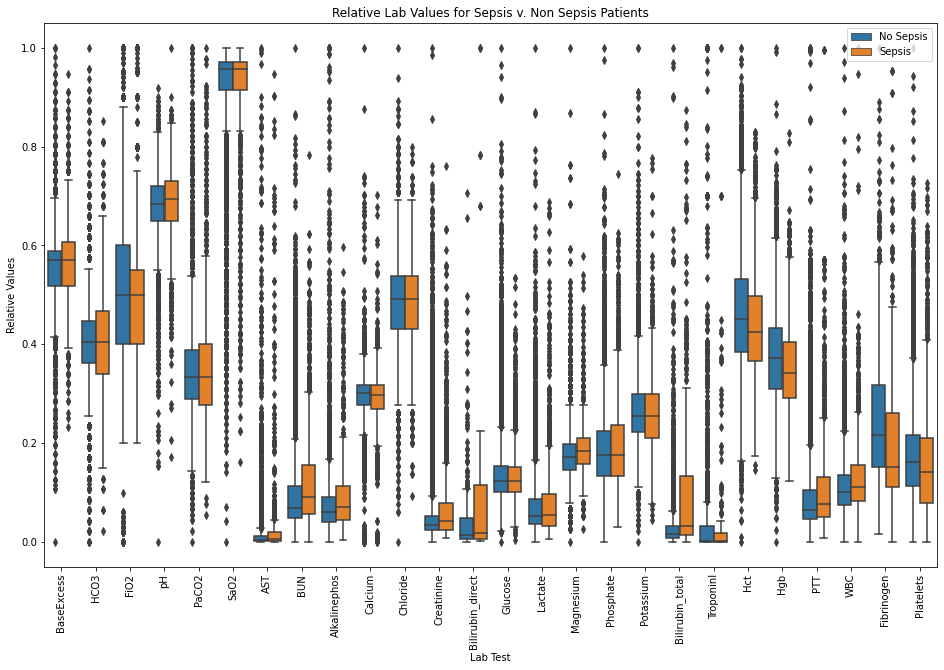

In [17]:
#Plot the distributions with boxplots
plt.subplots(figsize=(16,10))
sns.boxplot(x='Lab_Name',y='Relative_Value',hue='SepsisClassifier',data=df_lab_norm_melted)
plt.xticks(rotation='vertical')
plt.ylabel('Relative Values')
plt.xlabel('Lab Test')
plt.title('Relative Lab Values for Sepsis v. Non Sepsis Patients')
plt.legend(loc='upper right')
plt.show()

Almost no clear patterns between the groups for any of these variables. For example, while there is a visual difference in distributions between groups for Bilirubin direct, that could easily be attributed to the small number of lab values avaialable (i.e. noise). Bilirubin_total is the only exception, having lab values for over 30% of patients, and a seemingly different distribution. 

In [18]:
notes['Bilirubin_total']=notes['Bilirubin_total']+' Greater spread & average for this value in sepsis compared to non-sepsis'

Taking a step back fromt the lab values, is the presence of a lab value predictive of sepsis? 

In [19]:
df_=pd.concat([df.loc[:,'EtCO2':'Platelets'],df[['id']],df[['SepsisClassifier']]],axis=1)
GB=df_.groupby(['id','SepsisClassifier']).sum().reset_index().drop(columns='id')

In [20]:
pd.set_option('display.max_rows', None)

dict_=percent_there(GB,'EtCO2','Platelets','SepsisClassifier')
index_=['No Sepsis','Sepsis','Percent']
pd.DataFrame(dict_,index=index_).T.sort_values(by='Percent',ascending=False)

,No Sepsis,Sepsis,Percent
Bilirubin_direct,245.0,50.0,16.95
EtCO2,368.0,74.0,16.74
Lactate,1612.0,296.0,15.51
BaseExcess,709.0,119.0,14.37
FiO2,2381.0,356.0,13.01
PaCO2,2460.0,361.0,12.80
Fibrinogen,597.0,87.0,12.72
pH,2554.0,364.0,12.47
SaO2,1768.0,239.0,11.91
Bilirubin_total,1844.0,247.0,11.81


Yes, there is some information in whether or not a lab was ordered for a patient (I included ETCO2 bc its so rare).

## 6. Exploring Demographic Values <a class="anchor" id="6.ExploringDemographicValues"></a>

In [21]:
#Function to calculate percentage difference for specified categorical variable between sepsis groups
def categorical_difference(Cat1,Cat2,val1,val2):
    Sepsis_by_pat_1=np.array(df.loc[df[Cat1]==val1].groupby(['id'])[['SepsisLabel']].sum())
    Sepsis_by_pat_2=np.array(df.loc[df[Cat2]==val2].groupby(['id'])[['SepsisLabel']].sum())
    A_n=Sepsis_by_pat_1.size
    B_n=Sepsis_by_pat_2.size
    A=np.array([1 if i > 0 else 0 for i in np.nditer(Sepsis_by_pat_1)]).sum()
    B=np.array([1 if i > 0 else 0 for i in np.nditer(Sepsis_by_pat_2)]).sum()
    A_Sep=round(A/A_n*100,2)
    B_Sep=round(B/B_n*100,2)
    return A_Sep,B_Sep

In [22]:
#Determine the percent difference in sepsis group for each hospital, hospital unit, and gender
A,B =categorical_difference('HospitalA','HospitalA',1,0)
str=' {}% of patients at hospital A had sepsis compared to {}% at hospital B.'.format(A,B)
notes['HospitalA']= notes['HospitalA']+ str
print(str)

A,B =categorical_difference('Unit1','Unit2',1,1)
str=' {}% of patients in the MICU had sepsis compared to {}% in the SICU.'.format(A,B)
notes['Unit1']= notes['Unit1']+ str
notes['Unit2']= notes['Unit2']+ str
print(str)

A,B =categorical_difference('Gender','Gender',1,0)
str=' {}% of males had sepsis compared to {}% females.'.format(A,B)
notes['Gender']= notes['Gender']+ str
print(str)

 9.04% of patients at hospital A had sepsis compared to 5.95% at hospital B.
 8.15% of patients in the MICU had sepsis compared to 5.15% in the SICU.
 8.13% of males had sepsis compared to 7.04% females.


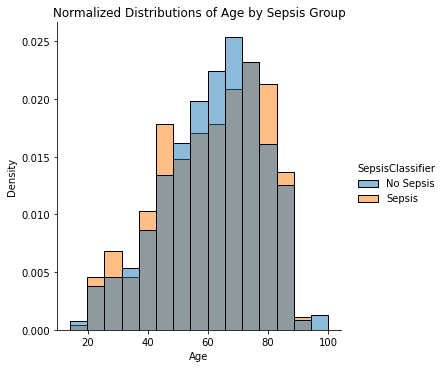

In [23]:
#Create a plot of the normalized distribution of age by sepsis group
df_age=df[['SepsisClassifier','id','Age']].groupby('id').first()
sns.displot(data=df_age,x='Age',hue='SepsisClassifier',stat='density',common_norm=False,bins=15)
plt.title('Normalized Distributions of Age by Sepsis Group')
plt.show()

In [24]:
#Summary stats on age for different sepsis groups
func={'Age':['median','mean','std','max','min']}
df_age.groupby('SepsisClassifier').aggregate(func)

Age                                    
                  median       mean        std     max   min
SepsisClassifier                                            
No Sepsis         63.655  61.708823  16.279545  100.00  14.0
Sepsis            63.320  61.021133  16.844626   88.98  17.0

In [25]:
notes['Age']=notes['Age']+'. The Sepsis group has a slightly larger average spread of ages compared to the non-sepsis group.\
std of 16.8 compared to 16.2.'

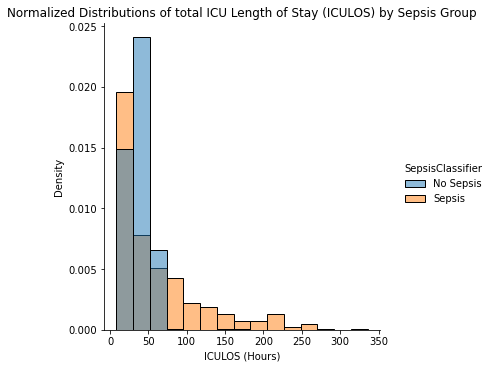

In [26]:
#Create a plot of the normalized distribution of total ICULOS by sepsis group
df_ICULOS=df[['SepsisClassifier','id','ICULOS']].groupby('id').last()
sns.displot(data=df_ICULOS,x='ICULOS',hue='SepsisClassifier',stat='density',common_norm=False,bins=15)
plt.title('Normalized Distributions of total ICU Length of Stay (ICULOS) by Sepsis Group')
plt.xlabel('ICULOS (Hours)')
plt.show()

In [27]:
#Summary stats on ICULOS for different sepsis groups
func={'ICULOS':['median','mean','std','max','min']}

print('Summary Statistics for ICULOS by Sepsis Groups')
df_ICULOS.groupby('SepsisClassifier').aggregate(func)

Summary Statistics for ICULOS by Sepsis Groups


ICULOS                               
                 median       mean        std  max min
SepsisClassifier                                      
No Sepsis            39  37.381546  14.705137  327   8
Sepsis               38  59.681917  59.344850  336   8

Unsurprisingly, patients that develop sepsis have a much longer hospital stay, on average. So now the question, on average when does sepsis appear? Compared to average/median stay of those that don't develop sepsis?

In [28]:
df_=df.loc[df.SepsisClassifier=='Sepsis'].copy()
df_=df_.loc[df_.SepsisOnset==1]
func={'ICULOS':['median','mean','std','max','min']}
print('Summary Statistics for Sepsis Onset Times')
df_.aggregate(func).T

Summary Statistics for Sepsis Onset Times


,median,mean,std,max,min
ICULOS,29.0,51.150327,59.269215,331.0,1.0


So while the average onset of sepsis is hour 51 in the ICU, the median of 29 is actually less than the median stay of 39 hours of non-sepsis patients. Still, length of ICU stay will likely be an important component in predicting sepsis.

In [29]:
notes['ICULOS']=notes['ICULOS']+' Unsurprisingly, patients that develop sepsis have a much longer hospital stay, on average. \
However,  the average onset of sepsis is hour 51 in the ICU, the median of 29 is actually less than the median stay of 39 \
hours of non-sepsis patients. '

## 7. Save Data <a class="anchor" id="7.SaveData"></a>

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231307 entries, 0 to 231306
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HR                208443 non-null  float64
 1   O2Sat             201090 non-null  float64
 2   Temp              78438 non-null   float64
 3   SBP               196849 non-null  float64
 4   MAP               202386 non-null  float64
 5   DBP               154566 non-null  float64
 6   Resp              196272 non-null  float64
 7   EtCO2             8128 non-null    float64
 8   BaseExcess        14093 non-null   float64
 9   HCO3              10497 non-null   float64
 10  FiO2              20598 non-null   float64
 11  pH                17453 non-null   float64
 12  PaCO2             13842 non-null   float64
 13  SaO2              8667 non-null    float64
 14  AST               3801 non-null    float64
 15  BUN               16168 non-null   float64
 16  Alkalinephos      37

In [31]:
#Save the data 
pd.DataFrame.to_csv(df,'sepsis_data_postEDA.csv')

#Save the notes
with open("Data_Notes.json", "w") as outfile:  
    json.dump(notes, outfile) 